# Taller 7 - Ecuaciones en derivadas parciales
*Prof. Dr. Ricardo Prato*

Estudiantes: Mariana Gómez Piedrahíta & David Andrés Romero Millán

In [1]:
%matplotlib inline
from sympy import *
from scipy.integrate import quad
from scipy.optimize import fminbound, fsolve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Punto 1.a

In [2]:
import fractions
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

Coeficientes de 1ra derivada con precisión 1 (forward)

In [3]:
A = np.array([[1, 1], [0, 1]])
b = np.array([0, 1])
alpha = np.linalg.solve(A, b)
alpha

array([-1, 1])

Coeficientes de 1ra derivada con precisión 2 (forward)

In [4]:
A = np.array([[1, 1, 1], [0, 1, 2], [0, 1, 4]])
b = np.array([0, 1, 0])
alpha = np.linalg.solve(A, b)
alpha

array([-3/2, 2, -1/2])

Coeficientes de 1ra derivada con precisión 3 (forward)

In [5]:
A = np.array([[1, 1, 1, 1], [0, 1, 2, 3], [0, 1, 4, 9], [0, 1, 8, 27]])
b = np.array([0, 1, 0, 0])
alpha = np.linalg.solve(A, b)
alpha

array([-11/6, 3, -3/2, 1/3])

Coeficientes de 1ra derivada con precisión 4 (forward)

In [6]:
A = np.array([[1, 1, 1, 1, 1], [0, 1, 2, 3, 4], [0, 1, 4, 9, 16], [0, 1, 8, 27, 64], [0, 1, 16, 81, 256]])
b = np.array([0, 1, 0, 0, 0])
alpha = np.linalg.solve(A, b)
alpha

array([-25/12, 4, -3, 4/3, -1/4])

Coeficientes de 1ra derivada con precisión 6 (forward)

In [7]:
A = np.array([[1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6], [0, 1, 4, 9, 16, 25, 36], [0, 1, 8, 27, 64, 125, 216], [0, 1, 16, 81, 256, 625, 1296], [0, 1, 32, 243, 1024, 3125, 7776], [0, 1, 64, 729, 4096, 15625, 46656]])
b = np.array([0, 1, 0, 0, 0, 0, 0])
alpha = np.linalg.solve(A, b)
alpha

array([-49/20, 6, -15/2, 20/3, -15/4, 6/5, -1/6])

Coeficientes de 1ra derivada con precisión 1 (backward)

In [8]:
A = np.array([[1, 1], [-1, 0]])
b = np.array([0, 1])
alpha = np.linalg.solve(A, b)
alpha

array([-1, 1])

Coeficientes de 1ra derivada con precisión 2 (backward)

In [9]:
A = np.array([[1, 1, 1], [-2, -1, 0], [4, 1, 0]])
b = np.array([0, 1, 0])
alpha = np.linalg.solve(A, b)
alpha

array([1/2, -2, 3/2])

Coeficientes de 1ra derivada con precisión 3 (backward)

In [10]:
A = np.array([[1, 1, 1, 1], [-3, -2, -1, 0], [9, 4, 1, 0], [-27, -8, -1, 0]])
b = np.array([0, 1, 0, 0])
alpha = np.linalg.solve(A, b)
alpha

array([-1/3, 3/2, -3, 11/6])

Coeficientes de 1ra derivada con precisión 4 (backward)

In [11]:
A = np.array([[1, 1, 1, 1, 1], [-4, -3, -2, -1, 0], [16, 9, 4, 1, 0], [-64, -27, -8, -1, 0],[256, 81, 16, 1, 0]])
b = np.array([0, 1, 0, 0, 0])
alpha = np.linalg.solve(A, b)
alpha

array([1/4, -4/3, 3, -4, 25/12])

Coeficientes de 1ra derivada con precisión 6 (backward)

In [12]:
A = np.array([[1, 1, 1, 1, 1, 1, 1], [-6, -5, -4, -3, -2, -1, 0], [36, 25, 16, 9, 4, 1, 0], [-216, -125, -64, -27, -8, -1, 0],[1296, 625, 256, 81, 16, 1, 0], [-7776, -3125, -1024, -243, -32, -1, 0], [46656, 15625, 4096, 729, 64, 1, 0]])
b = np.array([0, 1, 0, 0, 0, 0, 0])
alpha = np.linalg.solve(A, b)
alpha

array([1/6, -6/5, 15/4, -20/3, 15/2, -6, 49/20])

## Punto 1.b

In [13]:
np.set_printoptions()

Función $f(x)$

In [14]:
a = np.pi/2
x = symbols('x')
fs = (x**2)*sin(x)-x*cos(x**2)
f = lambdify(x, fs, 'numpy')

Primera derivada de $f(x)$

In [15]:
f1s = diff(fs,x)
fd1 = lambdify(x, f1s, 'numpy')
fd1(a)

7.0034335425117895

Convergencia 1da derivada con precisión 1 (forward)

In [16]:
H1f = np.array([])
EH1f = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = (f(a+h)-f(a))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH1f[j-2]
        phi = h / H1f[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H1f = np.append(H1f, h)
    EH1f = np.append(EH1f, Eh)

1 & 0.500000000000 & 1.842056597379 & 5.161376945133 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 5.244415028492 & 1.759018514020 & 1.552985329678 \\ \hline
3 & 0.125000000000 & 6.359810924745 & 0.643622617767 & 1.450483737228 \\ \hline
4 & 0.062500000000 & 6.739121830159 & 0.264311712353 & 1.283974669163 \\ \hline
5 & 0.031250000000 & 6.885227757542 & 0.118205784970 & 1.160939713561 \\ \hline
6 & 0.015625000000 & 6.947753126474 & 0.055680416038 & 1.086058746476 \\ \hline
7 & 0.007812500000 & 6.976440172903 & 0.026993369608 & 1.044564909827 \\ \hline
8 & 0.003906250000 & 6.990147431985 & 0.013286110526 & 1.022686259787 \\ \hline
9 & 0.001953125000 & 6.996842986634 & 0.006590555878 & 1.011446762156 \\ \hline
10 & 0.000976562500 & 7.000151371257 & 0.003282171255 & 1.005749637206 \\ \hline
11 & 0.000488281250 & 7.001795731278 & 0.001637811234 & 1.002881427883 \\ \hline
12 & 0.000244140625 & 7.002615455207 & 0.000818087305 & 1.001442370593 \\ \hline
13 & 0.000122070312 & 7.003024703401

Convergencia 1da derivada con precisión 2 (forward)

In [17]:
H2f = np.array([])
EH2f = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((-3/2)*f(a)+2*f(a+h)+(-1/2)*f(a+2*h))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH2f[j-2]
        phi = h / H2f[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H2f = np.append(H2f, h)
    EH2f = np.append(EH2f, Eh)

1 & 0.500000000000 & 6.243337075434 & 0.760096467078 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 8.646773459605 & 1.643339917093 & -1.112376491946 \\ \hline
3 & 0.125000000000 & 7.475206820998 & 0.471773278487 & 1.800465314887 \\ \hline
4 & 0.062500000000 & 7.118432735573 & 0.114999193061 & 2.036469967857 \\ \hline
5 & 0.031250000000 & 7.031333684925 & 0.027900142413 & 2.043279346680 \\ \hline
6 & 0.015625000000 & 7.010278495405 & 0.006844952894 & 2.027159968029 \\ \hline
7 & 0.007812500000 & 7.005127219333 & 0.001693676821 & 2.014881999715 \\ \hline
8 & 0.003906250000 & 7.003854691068 & 0.000421148556 & 2.007757489506 \\ \hline
9 & 0.001953125000 & 7.003538541282 & 0.000104998770 & 2.003956790315 \\ \hline
10 & 0.000976562500 & 7.003459755881 & 0.000026213369 & 2.001997749053 \\ \hline
11 & 0.000488281250 & 7.003440091299 & 0.000006548787 & 2.001003086971 \\ \hline
12 & 0.000244140625 & 7.003435179138 & 0.000001636626 & 2.000502699352 \\ \hline
13 & 0.000122070312 & 7.00343395159

Convergencia 1da derivada con precisión 3 (forward)

In [18]:
H3f = np.array([])
EH3f = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((-11/6)*f(a)+3*f(a+h)+(-3/2)*f(a+2*h)+(1/3)*f(a+3*h))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH3f[j-2]
        phi = h / H3f[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H3f = np.append(H3f, h)
    EH3f = np.append(EH3f, Eh)

1 & 0.500000000000 & 13.232687332417 & 6.229253789905 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 8.605082731079 & 1.601649188567 & 1.959501164497 \\ \hline
3 & 0.125000000000 & 7.036654304338 & 0.033220761826 & 5.591329218758 \\ \hline
4 & 0.062500000000 & 6.999237124906 & 0.004196417606 & 2.984854998210 \\ \hline
5 & 0.031250000000 & 7.002524593655 & 0.000908948856 & 2.206887228625 \\ \hline
6 & 0.015625000000 & 7.003300342183 & 0.000133200329 & 2.770601472619 \\ \hline
7 & 0.007812500000 & 7.003415804185 & 0.000017738327 & 2.908655788150 \\ \hline
8 & 0.003906250000 & 7.003431261355 & 0.000002281156 & 2.959032685152 \\ \hline
9 & 0.001953125000 & 7.003433253503 & 0.000000289009 & 2.980578836148 \\ \hline
10 & 0.000976562500 & 7.003433506149 & 0.000000036363 & 2.990584679633 \\ \hline
11 & 0.000488281250 & 7.003433537958 & 0.000000004554 & 2.997251891533 \\ \hline
12 & 0.000244140625 & 7.003433541938 & 0.000000000574 & 2.987883349278 \\ \hline
13 & 0.000122070312 & 7.00343354244

Convergencia 1da derivada con precisión 4 (forward)

In [19]:
H4f = np.array([])
EH4f = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((-25/12)*f(a)+4*f(a+h)+(-3)*f(a+2*h)+(4/3)*f(a+3*h)+(-1/4)*f(a+4*h))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH4f[j-2]
        phi = h / H4f[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H4f = np.append(H4f, h)
    EH4f = np.append(EH4f, Eh)

1 & 0.500000000000 & 29.094463885267 & 22.091030342755 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 6.076574161330 & 0.926859381182 & 4.574966422017 \\ \hline
3 & 0.125000000000 & 6.892563392961 & 0.110870149551 & 3.063479486876 \\ \hline
4 & 0.062500000000 & 6.998424378331 & 0.005009164181 & 4.468157281048 \\ \hline
5 & 0.031250000000 & 7.003196370495 & 0.000237172017 & 4.400564189959 \\ \hline
6 & 0.015625000000 & 7.003421072034 & 0.000012470478 & 4.249345137388 \\ \hline
7 & 0.007812500000 & 7.003432834812 & 0.000000707700 & 4.139234654713 \\ \hline
8 & 0.003906250000 & 7.003433500483 & 0.000000042028 & 4.073700137630 \\ \hline
9 & 0.001953125000 & 7.003433539951 & 0.000000002561 & 4.036804089436 \\ \hline
10 & 0.000976562500 & 7.003433542355 & 0.000000000157 & 4.029305711173 \\ \hline
11 & 0.000488281250 & 7.003433542506 & 0.000000000006 & 4.803210040966 \\ \hline
12 & 0.000244140625 & 7.003433542497 & 0.000000000015 & -1.389141835012 \\ \hline
13 & 0.000122070312 & 7.003433542

Convergencia 1da derivada con precisión 6 (forward)

In [20]:
H6f = np.array([])
EH6f = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((-49/20)*f(a)+6*f(a+h)+(-15/2)*f(a+2*h)+(20/3)*f(a+3*h)+(-15/4)*f(a+4*h)+(6/5)*f(a+5*h)+(-1/6)*f(a+6*h))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH6f[j-2]
        phi = h / H6f[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H6f = np.append(H6f, h)
    EH6f = np.append(EH6f, Eh)

1 & 0.500000000000 & 116.903154081251 & 109.899720538739 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 5.855639496295 & 1.147794046217 & 6.581180111416 \\ \hline
3 & 0.125000000000 & 7.046487221468 & 0.043053678956 & 4.736583464019 \\ \hline
4 & 0.062500000000 & 7.003628587645 & 0.000195045133 & 7.786184712020 \\ \hline
5 & 0.031250000000 & 7.003433568232 & 0.000000025720 & 12.888620848788 \\ \hline
6 & 0.015625000000 & 7.003433525958 & 0.000000016554 & 0.635698540738 \\ \hline
7 & 0.007812500000 & 7.003433542146 & 0.000000000365 & 5.501664099777 \\ \hline
8 & 0.003906250000 & 7.003433542506 & 0.000000000006 & 5.877797556794 \\ \hline
9 & 0.001953125000 & 7.003433542511 & 0.000000000000 & 4.233155762814 \\ \hline
10 & 0.000976562500 & 7.003433542518 & 0.000000000006 & -4.257691984159 \\ \hline
11 & 0.000488281250 & 7.003433542535 & 0.000000000023 & -1.893802004081 \\ \hline
12 & 0.000244140625 & 7.003433542494 & 0.000000000017 & 0.429439347982 \\ \hline
13 & 0.000122070312 & 7.00343

Text(0.5,0,'log(h)')

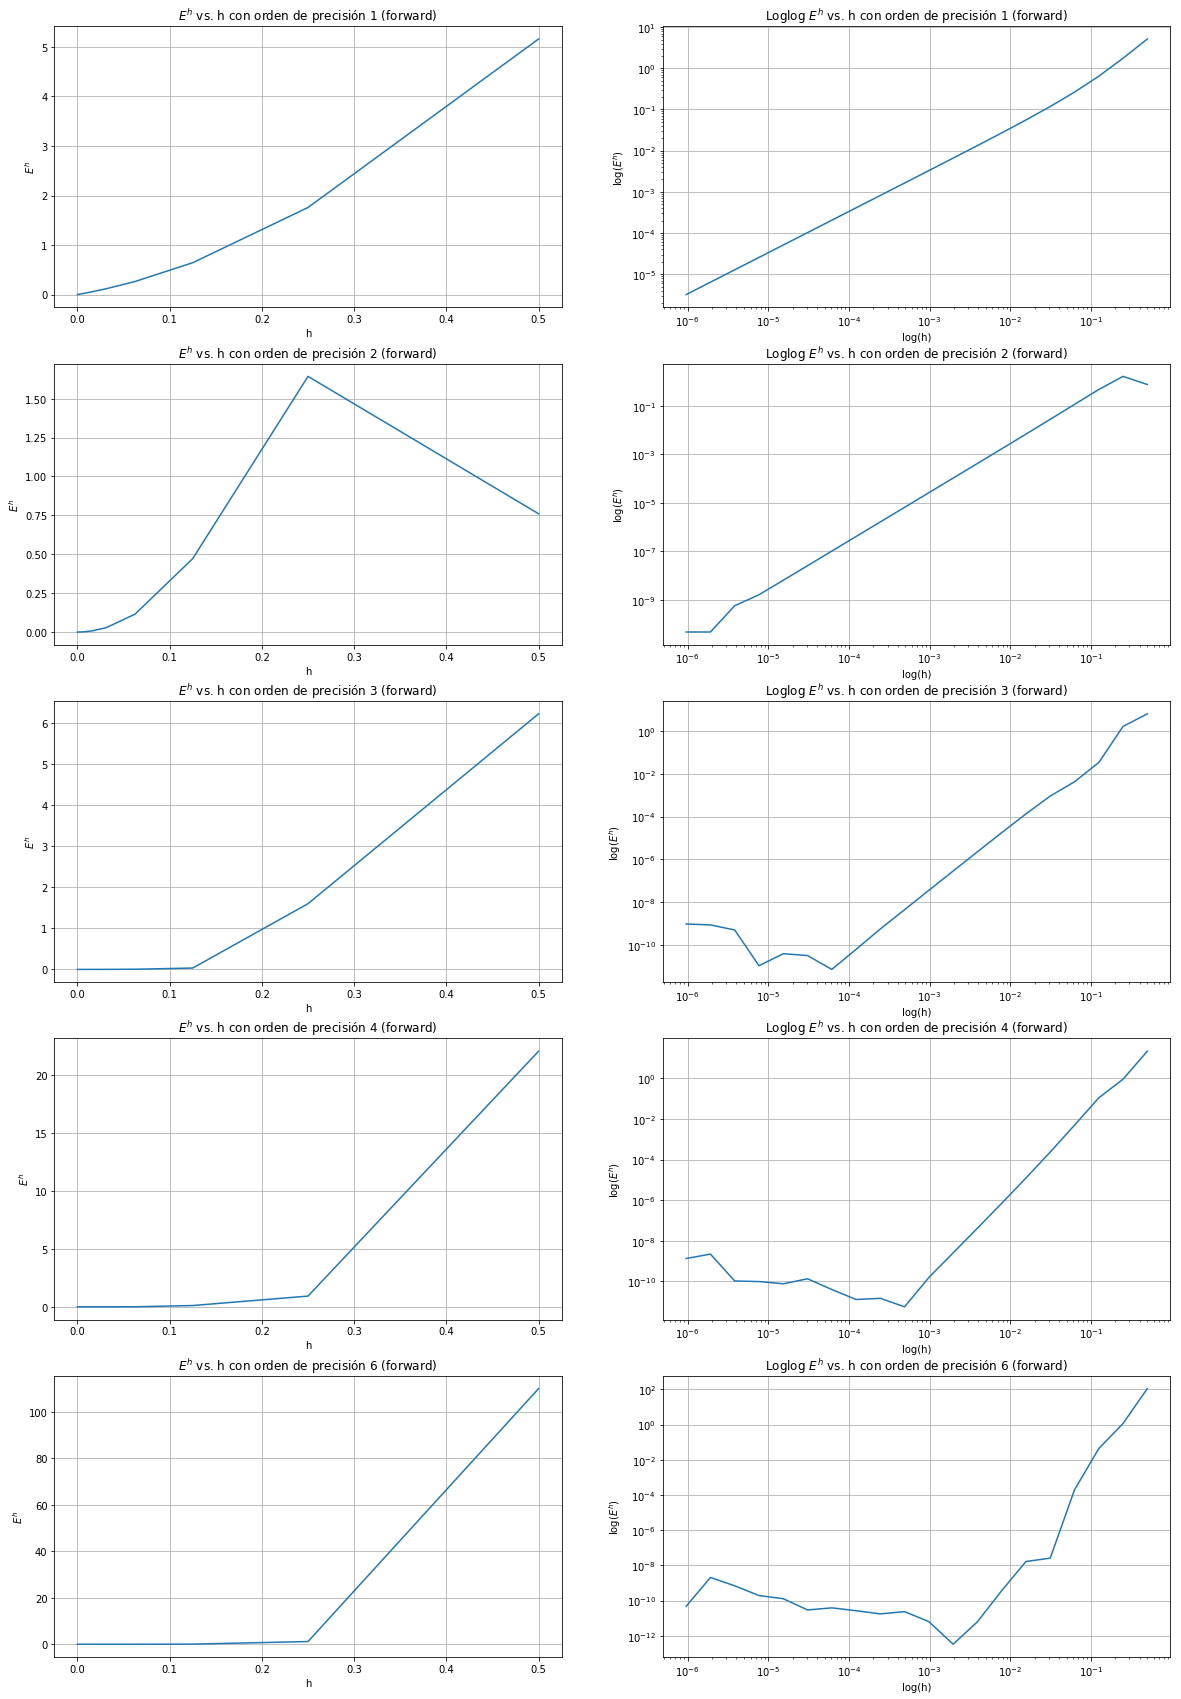

In [21]:
plt.subplots(5, 2, figsize=(20,30))
plt.subplot(5, 2, 1)
plt.plot(H1f, EH1f)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 1 (forward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 2)
plt.loglog(H1f, EH1f)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 1 (forward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 3)
plt.plot(H2f, EH2f)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 2 (forward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 4)
plt.loglog(H2f, EH2f)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 2 (forward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 5)
plt.plot(H3f, EH3f)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 3 (forward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 6)
plt.loglog(H3f, EH3f)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 3 (forward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 7)
plt.plot(H4f, EH4f)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 4 (forward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 8)
plt.loglog(H4f, EH4f)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 4 (forward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 9)
plt.plot(H6f, EH6f)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 6 (forward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 10)
plt.loglog(H6f, EH6f)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 6 (forward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

Convergencia 1da derivada con precisión 1 (backward)

In [22]:
H1b = np.array([])
EH1b = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = (-f(a-h)+f(a))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH1b[j-2]
        phi = h / H1b[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H1b = np.append(H1b, h)
    EH1b = np.append(EH1b, Eh)

1 & 0.500000000000 & 6.258016562050 & 0.745416980461 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 7.103905287234 & 0.100471744722 & 2.891257848836 \\ \hline
3 & 0.125000000000 & 7.221677731535 & 0.218244189023 & -1.119153406189 \\ \hline
4 & 0.062500000000 & 7.160742815973 & 0.157309273461 & 0.472339520261 \\ \hline
5 & 0.031250000000 & 7.094847830139 & 0.091414287628 & 0.783112146323 \\ \hline
6 & 0.015625000000 & 7.052413532344 & 0.048979989832 & 0.900227195010 \\ \hline
7 & 0.007812500000 & 7.028751646133 & 0.025318103622 & 0.952023126447 \\ \hline
8 & 0.003906250000 & 7.016300826578 & 0.012867284066 & 0.976461776008 \\ \hline
9 & 0.001953125000 & 7.009919391152 & 0.006485848640 & 0.988340310748 \\ \hline
10 & 0.000976562500 & 7.006689536918 & 0.003255994406 & 0.994197134948 \\ \hline
11 & 0.000488281250 & 7.005064809534 & 0.001631267022 & 0.997105265003 \\ \hline
12 & 0.000244140625 & 7.004249993763 & 0.000816451251 & 0.998554303953 \\ \hline
13 & 0.000122070312 & 7.00384197260

Convergencia 1da derivada con precisión 2 (backward)

In [23]:
H2b = np.array([])
EH2b = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((1/2)*f(a-2*h)+(-2)*f(a-h)+(3/2)*f(a))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH2b[j-2]
        phi = h / H2b[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H2b = np.append(H2b, h)
    EH2b = np.append(EH2b, Eh)

1 & 0.500000000000 & 8.456774279016 & 1.453340736505 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 7.949794012418 & 0.946360469906 & 0.618911265507 \\ \hline
3 & 0.125000000000 & 7.339450175836 & 0.336016633324 & 1.493857162298 \\ \hline
4 & 0.062500000000 & 7.099807900410 & 0.096374357899 & 1.801811402217 \\ \hline
5 & 0.031250000000 & 7.028952844306 & 0.025519301794 & 1.917060485361 \\ \hline
6 & 0.015625000000 & 7.009979234549 & 0.006545692037 & 1.962971224731 \\ \hline
7 & 0.007812500000 & 7.005089759923 & 0.001656217411 & 1.982653660674 \\ \hline
8 & 0.003906250000 & 7.003850007022 & 0.000416464510 & 1.991626603744 \\ \hline
9 & 0.001953125000 & 7.003537955726 & 0.000104413214 & 1.995889255507 \\ \hline
10 & 0.000976562500 & 7.003459682684 & 0.000026140173 & 1.997963725615 \\ \hline
11 & 0.000488281250 & 7.003440082150 & 0.000006539638 & 1.998986028769 \\ \hline
12 & 0.000244140625 & 7.003435177990 & 0.000001635479 & 1.999497786625 \\ \hline
13 & 0.000122070312 & 7.003433951439

Convergencia 1da derivada con precisión 3 (backward)

In [24]:
H3b = np.array([])
EH3b = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((-1/3)*f(a-3*h)+(3/2)*f(a-2*h)+(-3)*f(a-h)+(11/6)*f(a))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH3b[j-2]
        phi = h / H3b[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H3b = np.append(H3b, h)
    EH3b = np.append(EH3b, Eh)

1 & 0.500000000000 & 9.106250994271 & 2.102817451759 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 7.661728178270 & 0.658294635758 & 1.675518266491 \\ \hline
3 & 0.125000000000 & 7.104939795733 & 0.101506253221 & 2.697164835363 \\ \hline
4 & 0.062500000000 & 7.015635661507 & 0.012202118995 & 3.056364996217 \\ \hline
5 & 0.031250000000 & 7.004834971616 & 0.001401429104 & 3.122161037273 \\ \hline
6 & 0.015625000000 & 7.003597394186 & 0.000163851674 & 3.096436444453 \\ \hline
7 & 0.007812500000 & 7.003453194515 & 0.000019652004 & 3.059642100688 \\ \hline
8 & 0.003906250000 & 7.003435943241 & 0.000002400730 & 3.033131603435 \\ \hline
9 & 0.001953125000 & 7.003433838993 & 0.000000296481 & 3.017459051660 \\ \hline
10 & 0.000976562500 & 7.003433579341 & 0.000000036829 & 3.009031001270 \\ \hline
11 & 0.000488281250 & 7.003433547106 & 0.000000004595 & 3.002825551253 \\ \hline
12 & 0.000244140625 & 7.003433543072 & 0.000000000560 & 3.036213929541 \\ \hline
13 & 0.000122070312 & 7.003433542566

Convergencia 1da derivada con precisión 4 (backward)

In [25]:
H4b = np.array([])
EH4b = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((1/4)*f(a-4*h)+(-4/3)*f(a-3*h)+(3)*f(a-2*h)+(-4)*f(a-h)+(25/12)*f(a))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH4b[j-2]
        phi = h / H4b[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H4b = np.append(H4b, h)
    EH4b = np.append(EH4b, Eh)

1 & 0.500000000000 & 9.041802022554 & 2.038368480042 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 7.304510942424 & 0.301077399912 & 2.759208551301 \\ \hline
3 & 0.125000000000 & 7.011752492007 & 0.008318949495 & 5.177589248910 \\ \hline
4 & 0.062500000000 & 7.002761220222 & 0.000672322290 & 3.629176472425 \\ \hline
5 & 0.031250000000 & 7.003336409650 & 0.000097132862 & 2.791121603177 \\ \hline
6 & 0.015625000000 & 7.003425482855 & 0.000008059657 & 3.591169100600 \\ \hline
7 & 0.007812500000 & 7.003432972920 & 0.000000569592 & 3.822717623642 \\ \hline
8 & 0.003906250000 & 7.003433504801 & 0.000000037710 & 3.916897972339 \\ \hline
9 & 0.001953125000 & 7.003433540089 & 0.000000002423 & 3.960331526610 \\ \hline
10 & 0.000976562500 & 7.003433542358 & 0.000000000154 & 3.976823534340 \\ \hline
11 & 0.000488281250 & 7.003433542512 & 0.000000000000 & 9.910526144342 \\ \hline
12 & 0.000244140625 & 7.003433542504 & 0.000000000007 & -5.539503499926 \\ \hline
13 & 0.000122070312 & 7.00343354250

Convergencia 1da derivada con precisión 6 (backward)

In [26]:
H6b = np.array([])
EH6b = np.array([])
for j in range(1, 20+1):
    h = 2**(-j)
    f1 = ((1/6)*f(a-6*h)+(-6/5)*f(a-5*h)+(15/4)*f(a-4*h)+(-20/3)*f(a-3*h)+(15/2)*f(a-2*h)+(-6)*f(a-h)+(49/20)*f(a))/h
    Eh = np.abs(f1 - fd1(a))
    alpha = -1
    if j > 1:
        omega = Eh / EH6b[j-2]
        phi = h / H6b[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, f1, Eh, alpha))
    H6b = np.append(H6b, h)
    EH6b = np.append(EH6b, Eh)

1 & 0.500000000000 & 8.695126692553 & 1.691693150041 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 6.945203219383 & 0.058230323129 & 4.860553472320 \\ \hline
3 & 0.125000000000 & 6.995745414249 & 0.007688128263 & 2.921066314239 \\ \hline
4 & 0.062500000000 & 7.003256172429 & 0.000177370082 & 5.437797814285 \\ \hline
5 & 0.031250000000 & 7.003430850690 & 0.000002691822 & 6.042035880997 \\ \hline
6 & 0.015625000000 & 7.003433505180 & 0.000000037332 & 6.172041050961 \\ \hline
7 & 0.007812500000 & 7.003433541987 & 0.000000000525 & 6.152106420018 \\ \hline
8 & 0.003906250000 & 7.003433542503 & 0.000000000009 & 5.898488801008 \\ \hline
9 & 0.001953125000 & 7.003433542513 & 0.000000000002 & 2.407099413537 \\ \hline
10 & 0.000976562500 & 7.003433542512 & 0.000000000000 & 3.375425643380 \\ \hline
11 & 0.000488281250 & 7.003433542526 & 0.000000000014 & -6.492209273357 \\ \hline
12 & 0.000244140625 & 7.003433542486 & 0.000000000026 & -0.832321338788 \\ \hline
13 & 0.000122070312 & 7.0034335424

Text(0.5,0,'log(h)')

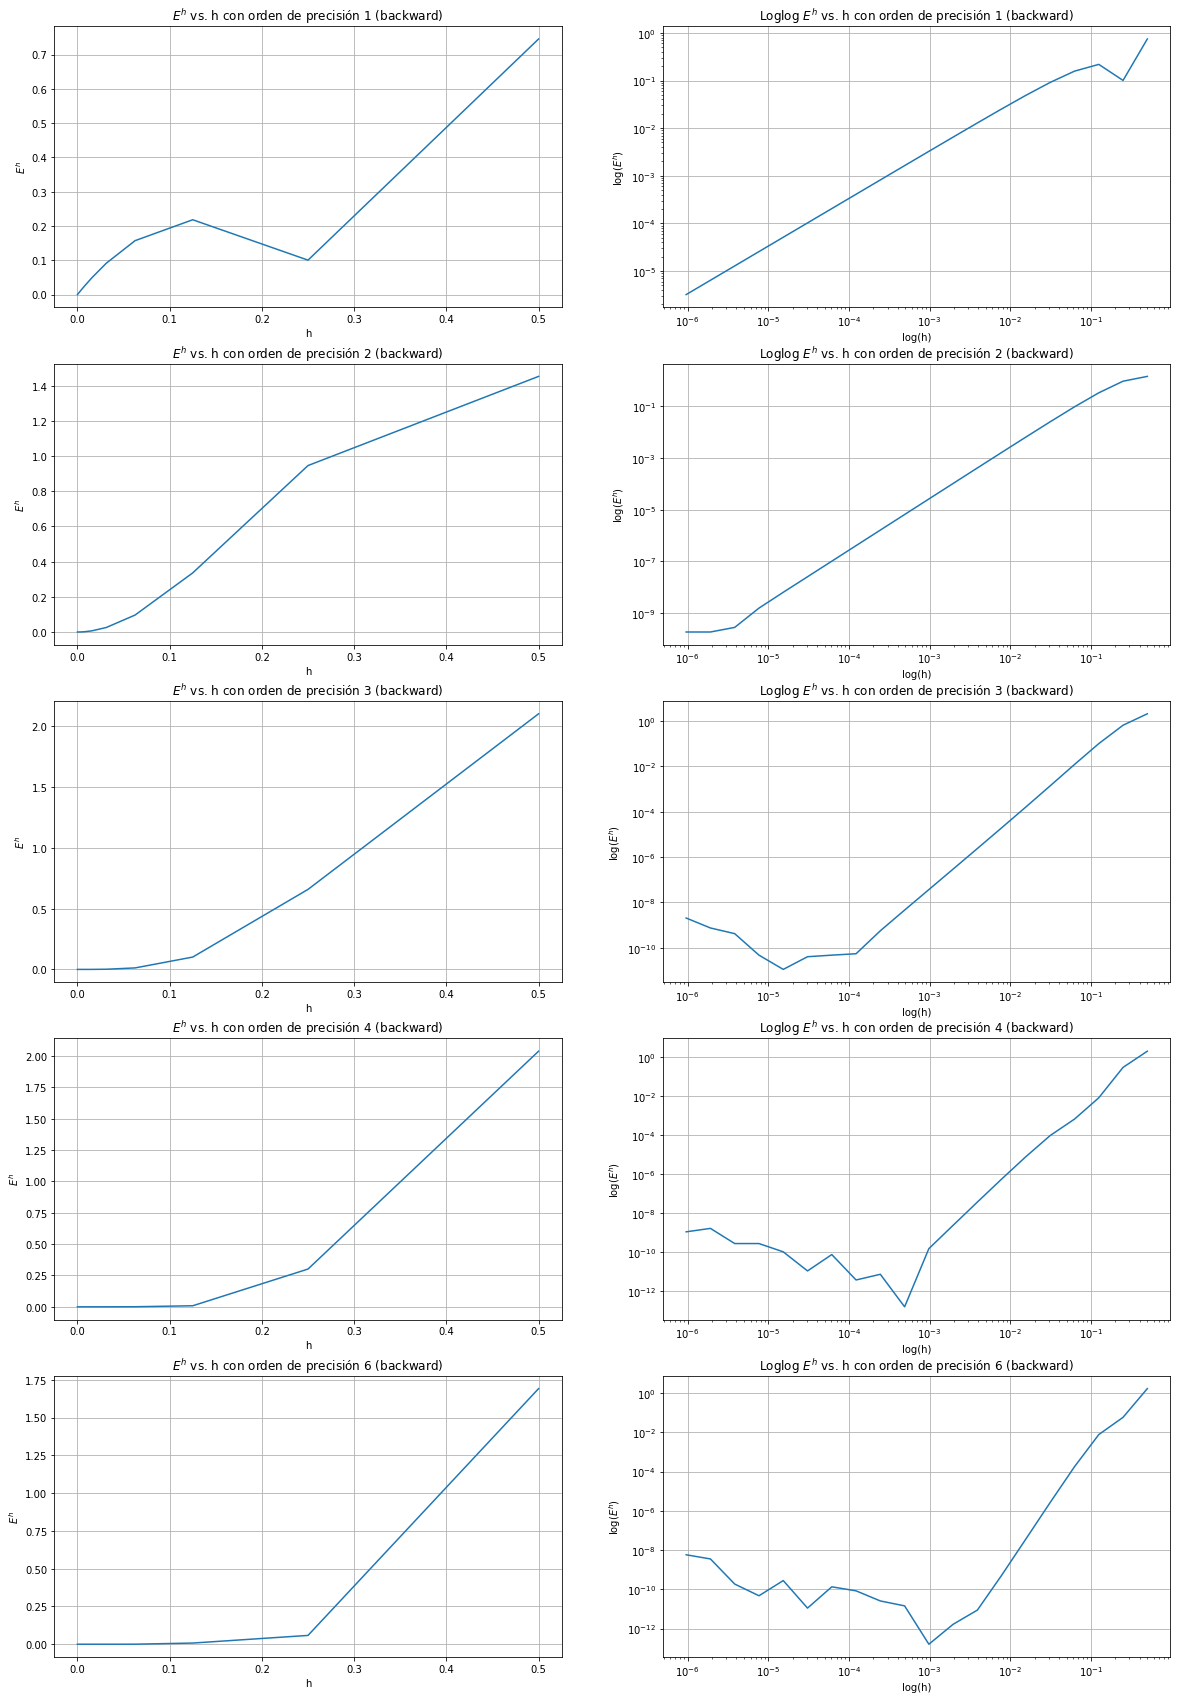

In [27]:
plt.subplots(5, 2, figsize=(20,30))
plt.subplot(5, 2, 1)
plt.plot(H1b, EH1b)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 1 (backward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 2)
plt.loglog(H1b, EH1b)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 1 (backward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 3)
plt.plot(H2b, EH2b)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 2 (backward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 4)
plt.loglog(H2b, EH2b)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 2 (backward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 5)
plt.plot(H3b, EH3b)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 3 (backward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 6)
plt.loglog(H3b, EH3b)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 3 (backward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 7)
plt.plot(H4b, EH4b)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 4 (backward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 8)
plt.loglog(H4b, EH4b)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 4 (backward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

plt.subplot(5, 2, 9)
plt.plot(H6b, EH6b)
plt.grid(True)
plt.title('$E^h$ vs. h con orden de precisión 6 (backward)')
plt.ylabel('$E^h$')
plt.xlabel('h')

plt.subplot(5, 2, 10)
plt.loglog(H6b, EH6b)
plt.grid(True)
plt.title('Loglog $E^h$ vs. h con orden de precisión 6 (backward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')

Comparación de aproximaciones *forward*

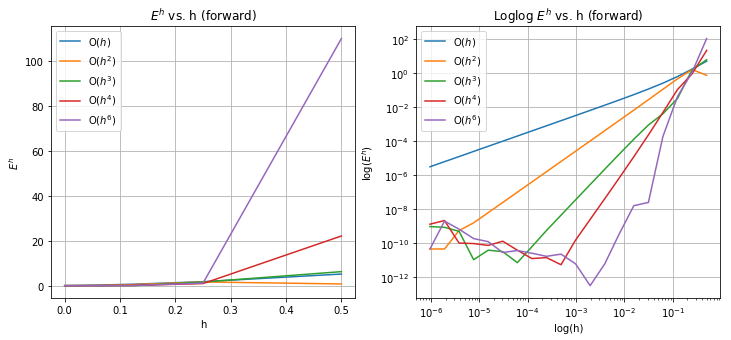

In [28]:
plt.subplots(2, 2, figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(H1f, EH1f, label='O($h$)')
plt.plot(H2f, EH2f, label='O($h^2$)')
plt.plot(H3f, EH3f, label='O($h^3$)')
plt.plot(H4f, EH4f, label='O($h^4$)')
plt.plot(H6f, EH6f, label='O($h^6$)')
plt.grid(True)
plt.title('$E^h$ vs. h (forward)')
plt.ylabel('$E^h$')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(H1f, EH1f, label='O($h$)')
plt.loglog(H2f, EH2f, label='O($h^2$)')
plt.loglog(H3f, EH3f, label='O($h^3$)')
plt.loglog(H4f, EH4f, label='O($h^4$)')
plt.loglog(H6f, EH6f, label='O($h^6$)')
plt.grid(True)
plt.title('Loglog $E^h$ vs. h (forward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')
plt.legend()

Comparación de aproximaciones *backward*

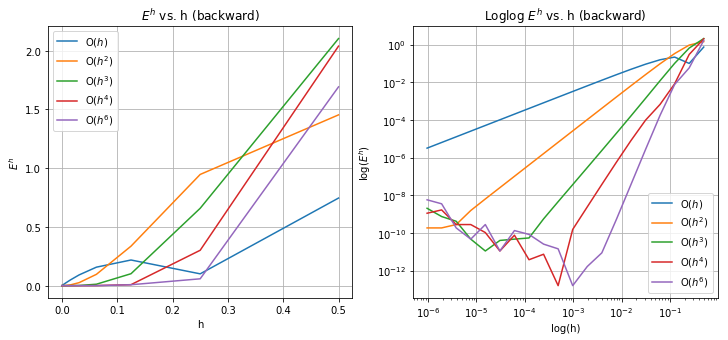

In [29]:
plt.subplots(2, 2, figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(H1b, EH1b, label='O($h$)')
plt.plot(H2b, EH2b, label='O($h^2$)')
plt.plot(H3b, EH3b, label='O($h^3$)')
plt.plot(H4b, EH4b, label='O($h^4$)')
plt.plot(H6b, EH6b, label='O($h^6$)')
plt.grid(True)
plt.title('$E^h$ vs. h (backward)')
plt.ylabel('$E^h$')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(H1b, EH1b, label='O($h$)')
plt.loglog(H2b, EH2b, label='O($h^2$)')
plt.loglog(H3b, EH3b, label='O($h^3$)')
plt.loglog(H4b, EH4b, label='O($h^4$)')
plt.loglog(H6b, EH6b, label='O($h^6$)')
plt.grid(True)
plt.title('Loglog $E^h$ vs. h (backward)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')
plt.legend()

## Punto 1.c

In [30]:
f2s = diff(f1s,x)
f3s = diff(f2s,x)
f4s = diff(f3s,x)
f5s = diff(f4s,x)
f6s = diff(f5s,x)
f7s = diff(f6s,x)
f2s_j = lambdify(x, -f2s, 'numpy')
f3s_j = lambdify(x, -f3s, 'numpy')
f4s_j = lambdify(x, -f4s, 'numpy')
f5s_j = lambdify(x, -f5s, 'numpy')
f7s_j = lambdify(x, -f7s, 'numpy')

**Cálculo de los coeficientes C y los h**

In [31]:
epsilon = 2.2*10**(-16)
e2f = 1*10**(-16)
h = symbols('h')

*p = 1, d = 1, forward*

In [32]:
r = fminbound(f2s_j, a, a+0.5)
c = r/np.math.factorial(2)
(r,c)

(1.570800773031105, 0.7854003865155526)

In [33]:
solve(c*h+(epsilon/h)-e2f,h)

[6.3661797038102e-17 - 1.67365440568729e-8*I,
 6.3661797038102e-17 + 1.67365440568729e-8*I]

In [34]:
h_min = np.sqrt(epsilon/c)
h_min

1.6736544056872942e-08

*p = 2, d = 1, forward*

In [35]:
r = fminbound(f3s_j, a, a+0.5)
c = r/np.math.factorial(3)
(r,c)

(2.070791887974655, 0.34513198132910916)

In [36]:
solve(c*(h**2)+(epsilon/h)-e2f,h)

[-8.60623218024119e-6,
 4.3031160901206e-6 - 7.45319626139919e-6*I,
 4.3031160901206e-6 + 7.45319626139919e-6*I]

In [37]:
h_min = (epsilon/2*c)**(1/3)
h_min

3.360928679255065e-06

*p = 3, d = 1, forward*

In [38]:
r = fminbound(f4s_j, a, a+0.5)
c = r/np.math.factorial(4)
(r,c)

(2.070791887974655, 0.08628299533227729)

In [39]:
solve(c*(h**3)+(epsilon/h)-e2f,h)

[-0.000158894684565275 - 0.000158900422534568*I,
 -0.000158894684565275 + 0.000158900422534568*I,
 0.000158894684565275 - 0.000158888946388765*I,
 0.000158894684565275 + 0.000158888946388765*I]

In [40]:
h_min = (epsilon/3*c)**(1/4)
h_min

5.015412521236755e-05

*p = 4, d = 1, forward*

In [41]:
r = fminbound(f5s_j, a, a+0.5)
c = r/np.math.factorial(5)
(r,c)

(1.8798259895704845, 0.01566521657975404)

In [42]:
solve(c*(h**4)+(epsilon/h)-e2f,h)

[-0.00169654042050068,
 -0.000523967413171104 - 0.00161341086023177*I,
 -0.000523967413171104 + 0.00161341086023177*I,
 0.00137223762342144 - 0.000996798896709381*I,
 0.00137223762342144 + 0.000996798896709381*I]

In [43]:
h_min = (epsilon/4*c)**(1/5)
h_min

0.0002438146619371302

*p = 6, d = 1, forward*

In [44]:
r = fminbound(f7s_j, a, a+0.5)
c = r/np.math.factorial(7)
(r,c)

(1.570800773031105, 0.0003116668200458542)

In [45]:
solve(c*(h**6)+(epsilon/h)-e2f,h)

[-0.0183916669421237,
 -0.0114485581710176 - 0.0143834334226513*I,
 -0.0114485581710176 + 0.0143834334226513*I,
 0.00410744137022481 - 0.01789977092164*I,
 0.00410744137022481 + 0.01789977092164*I,
 0.0165369502718546 - 0.00795317757143467*I,
 0.0165369502718546 + 0.00795317757143467*I]

In [46]:
h_min = (epsilon/6*c)**(1/7)
h_min

0.0014162418661693803

*p = 1, d = 1, backward*

In [47]:
r = fminbound(f2s_j, a-0.5, a)
c = r/np.math.factorial(2)
(r,c)

(1.111771749113143, 0.5558858745565715)

In [48]:
solve(c*h+(epsilon/h)-e2f,h)

[8.99465201195927e-17 - 1.98938354403119e-8*I,
 8.99465201195927e-17 + 1.98938354403119e-8*I]

In [49]:
h_min = np.sqrt(epsilon/c)
h_min

1.9893835440311846e-08

*p = 2, d = 1, backward*

In [50]:
r = fminbound(f3s_j, a-0.5, a)
c = r/np.math.factorial(3)
(r,c)

(1.0708007804473036, 0.17846679674121727)

In [51]:
solve(c*(h**2)+(epsilon/h)-e2f,h)

[-1.07223288546068e-5,
 5.3611644273034e-6 - 9.2857790045549e-6*I,
 5.3611644273034e-6 + 9.2857790045549e-6*I]

In [52]:
h_min = (epsilon/2*c)**(1/3)
h_min

2.697636140526142e-06

*p = 3, d = 1, backward*

In [53]:
r = fminbound(f4s_j, a-0.5, a)
c = r/np.math.factorial(4)
(r,c)

(1.0708007804473036, 0.044616699185304316)

In [54]:
solve(c*(h**3)+(epsilon/h)-e2f,h)

[-0.000187377013737362 - 0.000187384993145919*I,
 -0.000187377013737362 + 0.000187384993145919*I,
 0.000187377013737362 - 0.000187369033988989*I,
 0.000187377013737362 + 0.000187369033988989*I]

In [55]:
h_min = (epsilon/3*c)**(1/4)
h_min

4.253042434250487e-05

*p = 4, d = 1, backward*

In [56]:
r = fminbound(f5s_j, a-0.5, a)
c = r/np.math.factorial(5)
(r,c)

(1.5707918805584564, 0.013089932337987137)

In [57]:
solve(c*(h**4)+(epsilon/h)-e2f,h)

[-0.00175859753402614,
 -0.000543122338151431 - 0.0016724236118157*I,
 -0.000543122338151431 + 0.0016724236118157*I,
 0.0014224211051645 - 0.00103324516964716*I,
 0.0014224211051645 + 0.00103324516964716*I]

In [58]:
h_min = (epsilon/4*c)**(1/5)
h_min

0.00023521229436549473

*p = 6, d = 1, backward*

In [59]:
r = fminbound(f7s_j, a-0.5, a)
c = r/np.math.factorial(7)
(r,c)

(1.432385306218464, 0.00028420343377350476)

In [60]:
solve(c*(h**6)+(epsilon/h)-e2f,h)

[-0.0186359252601313,
 -0.0116003588658783 - 0.0145745159867227*I,
 -0.0116003588658783 + 0.0145745159867227*I,
 0.00416219275583879 - 0.0181370844542035*I,
 0.00416219275583879 + 0.0181370844542035*I,
 0.0167561287401051 - 0.00805844470809026*I,
 0.0167561287401051 + 0.00805844470809026*I]

In [61]:
h_min = (epsilon/6*c)**(1/7)
h_min

0.001397701377017568

## Punto 2

Activar *"Pretty Printing"*

In [62]:
init_printing(use_unicode=True)

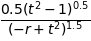

In [63]:
r, t = symbols('r t')
diff(((t**2-1)**(1/2))/((t**2-r)**(1/2)), r)

## Punto 3

h = 0.5, points = 3.0
1 & 0.5 & 0.000000000000 & -1.000000000000 & \\ \hline
1 & 0.5 & 0.500000000000 & -0.450000000000 & 1.100000000000 \\ \hline
1 & 0.5 & 1.000000000000 & 0.097438608224 & 1.094877216448 \\ \hline

h = 0.25, points = 5.0
2 & 0.25 & 0.000000000000 & -1.000000000000 & \\ \hline
2 & 0.25 & 0.250000000000 & -0.725000000000 & 1.100000000000 \\ \hline
2 & 0.25 & 0.500000000000 & -0.450632745339 & 1.097469018645 \\ \hline
2 & 0.25 & 0.750000000000 & -0.176881834327 & 1.095003644046 \\ \hline
2 & 0.25 & 1.000000000000 & 0.096268690238 & 1.092602098259 \\ \hline

h = 0.125, points = 9.0
3 & 0.125 & 0.000000000000 & -1.000000000000 & \\ \hline
3 & 0.125 & 0.125000000000 & -0.862500000000 & 1.100000000000 \\ \hline
3 & 0.125 & 0.250000000000 & -0.725157222430 & 1.098742220564 \\ \hline
3 & 0.125 & 0.375000000000 & -0.587969665470 & 1.097500455674 \\ \hline
3 & 0.125 & 0.500000000000 & -0.450935353400 & 1.096274496566 \\ \hline
3 & 0.125 & 0.625000000000 & -0.314052336234 & 1.09

h = 0.0078125, points = 129.0
7 & 0.0078125 & 0.000000000000 & -1.000000000000 & \\ \hline
7 & 0.0078125 & 0.007812500000 & -0.991406250000 & 1.100000000000 \\ \hline
7 & 0.0078125 & 0.015625000000 & -0.982813110590 & 1.099921844490 \\ \hline
7 & 0.0078125 & 0.023437500000 & -0.974220581292 & 1.099843750111 \\ \hline
7 & 0.0078125 & 0.031250000000 & -0.965628661630 & 1.099765716815 \\ \hline
7 & 0.0078125 & 0.039062500000 & -0.957037351125 & 1.099687744553 \\ \hline
7 & 0.0078125 & 0.046875000000 & -0.948446649303 & 1.099609833278 \\ \hline
7 & 0.0078125 & 0.054687500000 & -0.939856555686 & 1.099531982943 \\ \hline
7 & 0.0078125 & 0.062500000000 & -0.931267069799 & 1.099454193499 \\ \hline
7 & 0.0078125 & 0.070312500000 & -0.922678191167 & 1.099376464898 \\ \hline
7 & 0.0078125 & 0.078125000000 & -0.914089919315 & 1.099298797094 \\ \hline
7 & 0.0078125 & 0.085937500000 & -0.905502253768 & 1.099221190038 \\ \hline
7 & 0.0078125 & 0.093750000000 & -0.896915194052 & 1.099143643683 \\ \hli

h = 0.00390625, points = 257.0
8 & 0.00390625 & 0.000000000000 & -1.000000000000 & \\ \hline
8 & 0.00390625 & 0.003906250000 & -0.995703125000 & 1.100000000000 \\ \hline
8 & 0.00390625 & 0.007812500000 & -0.991406402618 & 1.099960929872 \\ \hline
8 & 0.00390625 & 0.011718750000 & -0.987109832793 & 1.099921875014 \\ \hline
8 & 0.00390625 & 0.015625000000 & -0.982813415468 & 1.099882835421 \\ \hline
8 & 0.00390625 & 0.019531250000 & -0.978517150580 & 1.099843811087 \\ \hline
8 & 0.00390625 & 0.023437500000 & -0.974221038073 & 1.099804802005 \\ \hline
8 & 0.00390625 & 0.027343750000 & -0.969925077884 & 1.099765808171 \\ \hline
8 & 0.00390625 & 0.031250000000 & -0.965629269956 & 1.099726829577 \\ \hline
8 & 0.00390625 & 0.035156250000 & -0.961333614229 & 1.099687866218 \\ \hline
8 & 0.00390625 & 0.039062500000 & -0.957038110643 & 1.099648918088 \\ \hline
8 & 0.00390625 & 0.042968750000 & -0.952742759138 & 1.099609985182 \\ \hline
8 & 0.00390625 & 0.046875000000 & -0.948447559656 & 1.099571

h = 0.001953125, points = 513.0
9 & 0.001953125 & 0.000000000000 & -1.000000000000 & \\ \hline
9 & 0.001953125 & 0.001953125000 & -0.997851562500 & 1.100000000000 \\ \hline
9 & 0.001953125 & 0.003906250000 & -0.995703163151 & 1.099980466843 \\ \hline
9 & 0.001953125 & 0.005859375000 & -0.993554801945 & 1.099960937502 \\ \hline
9 & 0.001953125 & 0.007812500000 & -0.991406478874 & 1.099941411976 \\ \hline
9 & 0.001953125 & 0.009765625000 & -0.989258193932 & 1.099921890265 \\ \hline
9 & 0.001953125 & 0.011718750000 & -0.987109947111 & 1.099902372368 \\ \hline
9 & 0.001953125 & 0.013671875000 & -0.984961738404 & 1.099882858285 \\ \hline
9 & 0.001953125 & 0.015625000000 & -0.982813567802 & 1.099863348013 \\ \hline
9 & 0.001953125 & 0.017578125000 & -0.980665435299 & 1.099843841554 \\ \hline
9 & 0.001953125 & 0.019531250000 & -0.978517340887 & 1.099824338905 \\ \hline
9 & 0.001953125 & 0.021484375000 & -0.976369284559 & 1.099804840067 \\ \hline
9 & 0.001953125 & 0.023437500000 & -0.974221266

h = 0.0009765625, points = 1025.0
10 & 0.0009765625 & 0.000000000000 & -1.000000000000 & \\ \hline
10 & 0.0009765625 & 0.000976562500 & -0.998925781250 & 1.100000000000 \\ \hline
10 & 0.0009765625 & 0.001953125000 & -0.997851572037 & 1.099990233898 \\ \hline
10 & 0.0009765625 & 0.002929687500 & -0.996777372361 & 1.099980468750 \\ \hline
10 & 0.0009765625 & 0.003906250000 & -0.995703182220 & 1.099970704556 \\ \hline
10 & 0.0009765625 & 0.004882812500 & -0.994629001613 & 1.099960941316 \\ \hline
10 & 0.0009765625 & 0.005859375000 & -0.993554830540 & 1.099951179029 \\ \hline
10 & 0.0009765625 & 0.006835937500 & -0.992480668999 & 1.099941417695 \\ \hline
10 & 0.0009765625 & 0.007812500000 & -0.991406516990 & 1.099931657315 \\ \hline
10 & 0.0009765625 & 0.008789062500 & -0.990332374511 & 1.099921897888 \\ \hline
10 & 0.0009765625 & 0.009765625000 & -0.989258241563 & 1.099912139415 \\ \hline
10 & 0.0009765625 & 0.010742187500 & -0.988184118143 & 1.099902381894 \\ \hline
10 & 0.0009765625 & 0

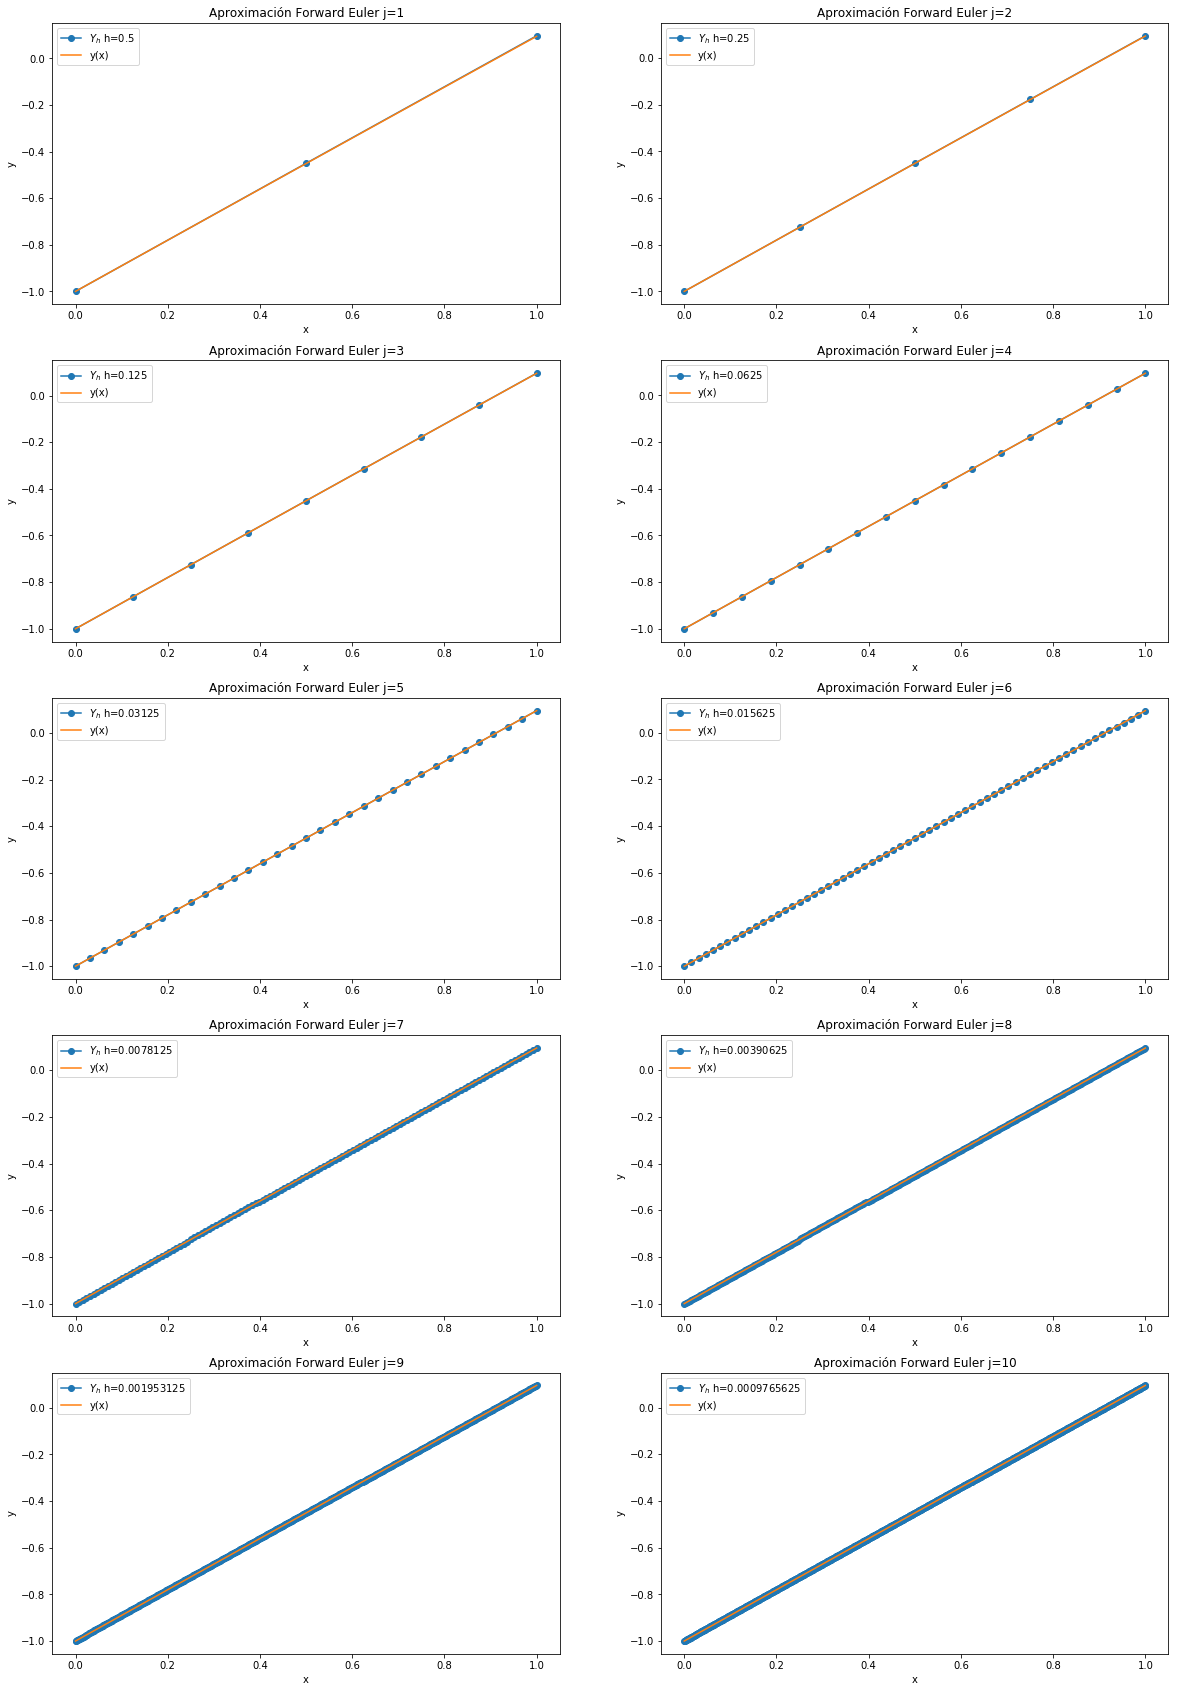

In [64]:
H = np.array([])
EH = np.array([])
X_real = np.linspace(0, 1)
Y_real = X_real-np.exp(-X_real/10)
plt.subplots(5, 2, figsize=(20,30))
for j in range(1, 10+1):
    h = 2**(-j)
    H = np.append(H, h)
    x0,y0 = 0,-1
    x1 = 1
    n = (x1-x0)/h
    Y = np.array([y0])
    X = np.array([x0])
    # Calculate approximation
    print('h = {}, points = {}'.format(h, n+1))
    print('{} & {} & {:.12f} & {:.12f} & \\\ \hline'.format(j, h, x0, y0))
    for i in range(int(n)):
        x,y = X[i],Y[i]
        f = (1/10)*np.exp(x/10)*((y-x)**2)+1
        Y = np.append(Y, y+h*f)
        X = np.append(X, x0+(i+1)*h)
        y_prime = (Y[i+1]-y)/(X[i+1]-x)
        print('{} & {} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j, h, X[i+1], Y[i+1], y_prime))
    print()
    # Calculate error using splines
    s = symbols('s')
    Eh2 = 0
    for i in range(len(X)-1):
        x1 = X[i]
        x2 = X[i+1]
        y1 = Y[i]
        y2 = Y[i+1]
        m = (y2-y1)/(x2-x1)
        b = -m*x1+y1
        psi = m*s+b
        yf = s-exp(-s/10)
        T = np.abs(yf-psi)**2
        js = lambdify(s, T, 'numpy')
        e2,_ = quad(lambda s: js(s), x1, x2)
        Eh2 += e2
    Eh = np.sqrt(Eh2)
    EH = np.append(EH, Eh)
    plt.subplot(5, 2, j)
    plt.plot(X, Y, '-o', label='$Y_h$ h={}'.format(h))
    plt.plot(X_real, Y_real, label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Aproximación Forward Euler j={}'.format(j))
    plt.legend()

Tabla de errores $E_h$

In [65]:
for j in range(10):
    h = 2**(-(j+1))
    Eh = EH[j]
    alpha = -1
    if j > 0:
        omega = Eh / EH[j-2]
        phi = h / H[j-2]
        alpha = np.log(float(omega)) / np.log(float(phi))
    print('{} & {:.12f} & {:.12f} & {:.12f} \\\ \hline'.format(j+1, h, Eh, alpha))

1 & 0.500000000000 & 0.001190566215 & -1.000000000000 \\ \hline
2 & 0.250000000000 & 0.000620492977 & 0.992871642110 \\ \hline
3 & 0.125000000000 & 0.000316528695 & 0.955619831071 \\ \hline
4 & 0.062500000000 & 0.000159833600 & 0.978422077941 \\ \hline
5 & 0.031250000000 & 0.000080308998 & 0.989351374512 \\ \hline
6 & 0.015625000000 & 0.000040252536 & 0.994709566967 \\ \hline
7 & 0.007812500000 & 0.000020150776 & 0.997363121437 \\ \hline
8 & 0.003906250000 & 0.000010081515 & 0.998683629728 \\ \hline
9 & 0.001953125000 & 0.000005042289 & 0.999342330232 \\ \hline
10 & 0.000976562500 & 0.000002521527 & 0.999671293806 \\ \hline


Gráfica de los errores $E_h$

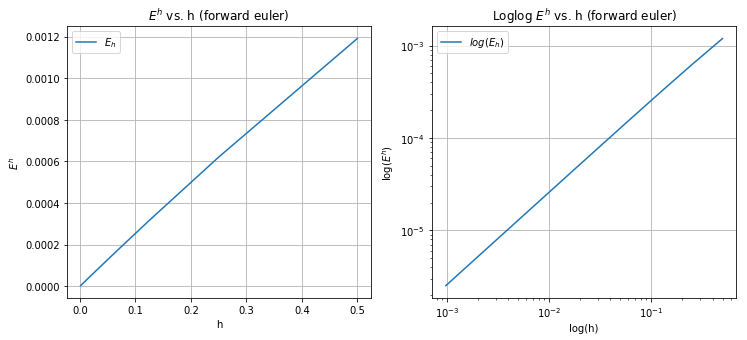

In [66]:
plt.subplots(2, 2, figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(H, EH, label='$E_h$')
plt.grid(True)
plt.title('$E^h$ vs. h (forward euler)')
plt.ylabel('$E^h$')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(H, EH, label='$log(E_h)$')
plt.grid(True)
plt.title('Loglog $E^h$ vs. h (forward euler)')
plt.ylabel('log($E^h$)')
plt.xlabel('log(h)')
plt.legend()